In [1]:
%matplotlib inline
import math
import torch
from d2l import torch as d2l

In [2]:
def f(x1, x2):
    return x1**2 + 2*x2**2

In [3]:
def f_grad(x1, x2):
    return 2*x1, 4*x2

In [4]:
def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    g1 += torch.normal(0.0, 1, (1,))
    g2 += torch.normal(0.0, 1, (1,))
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

In [5]:
def constant_lr():
    return 1

In [7]:
def train_2d(trainer, steps=20, f_grad=None):
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

epoch 50, x1: -0.100489, x2: 0.011842


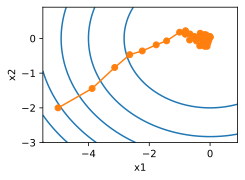

In [8]:
eta = 0.1
lr = constant_lr
d2l.show_trace_2d(f, train_2d(sgd, steps=50, f_grad=f_grad))

In [9]:
def exponential_lr():
    global t
    t += 1
    return math.exp(-0.1 * t)

epoch 1000, x1: -0.924954, x2: -0.050113


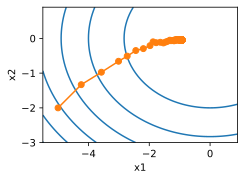

In [10]:
t = 1
lr = exponential_lr
d2l.show_trace_2d(f, train_2d(sgd, steps=1000, f_grad=f_grad))

In [11]:
def polynomial_lr():
    global t
    t += 1
    return (1 + 0.1 * t)**(-0.5)

epoch 50, x1: -0.054908, x2: -0.061255


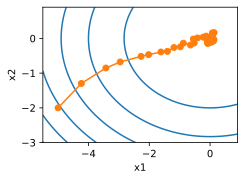

In [13]:
t = 1
lr = polynomial_lr
d2l.show_trace_2d(f, train_2d(sgd, steps=50, f_grad=f_grad))